# >Objective

Cleaning: Address missing values, remove duplicates, and standardize date
and location formats.
● Transformation: Normalize data for machine learning models, ensuring
consistency across all numerical features.
● Feature Engineering: Create derived variables, such as daily growth rates,
mortality ratios, and cases per population to enrich the dataset and strengthen
model insights.

Exploratory Data Analysis (EDA)
● Objective: Conduct EDA to uncover trends, correlations, and outliers in the
data.
● Visualizations: Use charts like line plots, bar charts, and scatter plots to
analyze COVID-19 trends, such as case and mortality rates over time.
● Key Insights: Focus on identifying demographic and environmental factors
that could influence the spread and severity of COVID-19 cases.
Model Development
● Machine Learning Models: Apply predictive models such as:
● Evaluation: Assess model performance with accuracy, precision, recall,
F1-score, or RMSE, as applicable.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [6]:
# Load the dataset
df = pd.read_csv(r"C:\Users\USER\Desktop\3MTT WORKS\day_wise.csv")

In [7]:
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13
...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    188 non-null    object 
 1   Confirmed               188 non-null    int64  
 2   Deaths                  188 non-null    int64  
 3   Recovered               188 non-null    int64  
 4   Active                  188 non-null    int64  
 5   New cases               188 non-null    int64  
 6   New deaths              188 non-null    int64  
 7   New recovered           188 non-null    int64  
 8   Deaths / 100 Cases      188 non-null    float64
 9   Recovered / 100 Cases   188 non-null    float64
 10  Deaths / 100 Recovered  188 non-null    float64
 11  No. of countries        188 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 17.8+ KB


In [9]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
count,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,4.406960e+06,230770.760638,2.066001e+06,2.110188e+06,87771.021277,3478.824468,50362.015957,4.860638,34.343936,22.104521,144.351064
std,4.757988e+06,217929.094183,2.627976e+06,1.969670e+06,75295.293255,2537.735652,56090.892479,1.579541,16.206159,22.568307,65.175979
min,5.550000e+02,17.000000,2.800000e+01,5.100000e+02,0.000000,0.000000,0.000000,2.040000,1.710000,6.260000,6.000000
25%,1.121910e+05,3935.000000,6.044125e+04,5.864175e+04,5568.500000,250.750000,2488.250000,3.510000,22.785000,9.650000,101.250000
50%,2.848733e+06,204190.000000,7.847840e+05,1.859759e+06,81114.000000,4116.000000,30991.500000,4.850000,35.680000,15.380000,184.000000
75%,7.422046e+06,418634.500000,3.416396e+06,3.587015e+06,131502.500000,5346.000000,79706.250000,6.297500,48.945000,25.342500,187.000000
max,1.648048e+07,654036.000000,9.468087e+06,6.358362e+06,282756.000000,9966.000000,284394.000000,7.180000,57.450000,134.430000,187.000000


In [11]:
# Handle missing values
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(0, inplace=True)  # Fill remaining NaNs with zeros

C:\Users\USER\AppData\Local\Temp\ipykernel_5772\2649586456.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [13]:
# Standardize date format
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Feature Engineering
# Daily growth rate: (New cases / Active cases)
df['Daily Growth Rate'] = (df['New cases'] / df['Active']).replace([np.inf, -np.inf], 0).fillna(0)

In [17]:
# Mortality Ratio: (Deaths / Confirmed cases)
df['Mortality Ratio'] = (df['Deaths'] / df['Confirmed']).replace([np.inf, -np.inf], 0).fillna(0)

In [18]:
df

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries,Daily Growth Rate,Mortality Ratio
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6,0.000000,0.030631
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8,0.163366,0.027523
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9,0.326507,0.027630
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11,0.364375,0.029289
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13,0.340299,0.026440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714,4.08,56.16,7.27,187,0.045857,0.040844
184,2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736,4.05,56.61,7.16,187,0.045259,0.040506
185,2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038,4.02,57.07,7.04,187,0.040927,0.040164
186,2020-07-26,16251796,648621,9293464,6309711,204606,4104,134721,3.99,57.18,6.98,187,0.032427,0.039911


In [19]:
# Cases per population: (Confirmed / No. of countries)
df['Cases Per Population'] = (df['Confirmed'] / df['No. of countries']).replace([np.inf, -np.inf], 0).fillna(0)

In [21]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 
                      'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases', 
                      'Deaths / 100 Recovered', 'Cases Per Population', 'Daily Growth Rate', 
                      'Mortality Ratio']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [23]:
# Preview data
print(df.head())

        Date  Confirmed    Deaths     Recovered    Active  New cases  \
0 2020-01-22   0.000000  0.000000  0.000000e+00  0.000000   0.000000   
1 2020-01-23   0.000006  0.000002  2.112365e-07  0.000015   0.000350   
2 2020-01-24   0.000023  0.000014  8.449461e-07  0.000058   0.001015   
3 2020-01-25   0.000053  0.000038  1.161801e-06  0.000133   0.001744   
4 2020-01-26   0.000095  0.000060  2.534838e-06  0.000236   0.002419   

   New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0    0.000000       0.000000            0.198444               0.059921   
1    0.000100       0.000007            0.138132               0.051668   
2    0.000803       0.000021            0.140078               0.038034   
3    0.001605       0.000011            0.173152               0.018120   
4    0.001405       0.000046            0.116732               0.013455   

   Deaths / 100 Recovered  No. of countries  Daily Growth Rate  \
0                0.424826                 6       

>Exploratory Data Analysis (EDA)

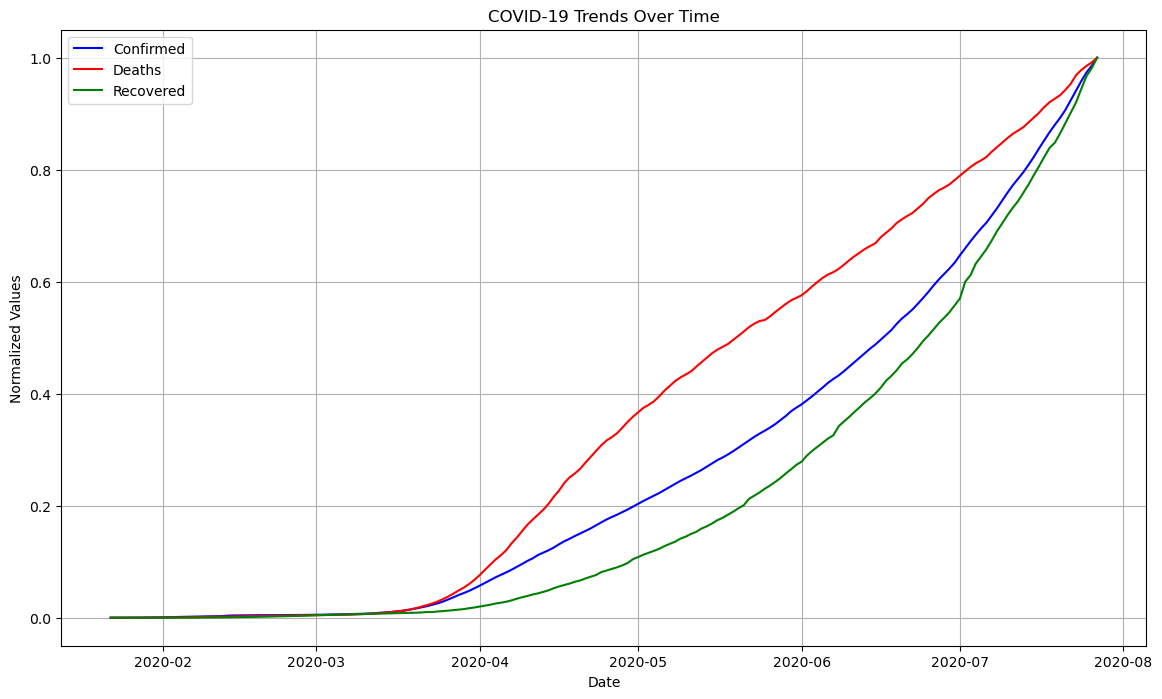

In [27]:
# Line plot: Trends in Confirmed, Deaths, and Recovered cases over time
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Confirmed'], label='Confirmed', color='blue')
plt.plot(df['Date'], df['Deaths'], label='Deaths', color='red')
plt.plot(df['Date'], df['Recovered'], label='Recovered', color='green')
plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.grid()
plt.show()

>Time-Series Model Development\\
>Will Use an ARIMA model to predict confirmed cases.

In [35]:
# Select the 'Confirmed' cases for time-series analysis
time_series = df[['Date', 'Confirmed']].set_index('Date')

In [36]:
# Split into training and test sets
train_size = int(len(time_series) * 0.8)
train, test = time_series[:train_size], time_series[train_size:]

In [37]:
# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust order (p, d, q) for best fit
model_fit = model.fit()

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [38]:
# Forecast
forecast = model_fit.forecast(steps=len(test))
test['Predicted'] = forecast.values

C:\Users\USER\AppData\Local\Temp\ipykernel_5772\3647846984.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predicted'] = forecast.values


In [39]:
# Evaluate model
mae = mean_absolute_error(test['Confirmed'], test['Predicted'])
accuracy = (1 - (mae / np.mean(test['Confirmed']))) * 100

In [40]:
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Absolute Error: 0.0653
Model Accuracy: 91.28%


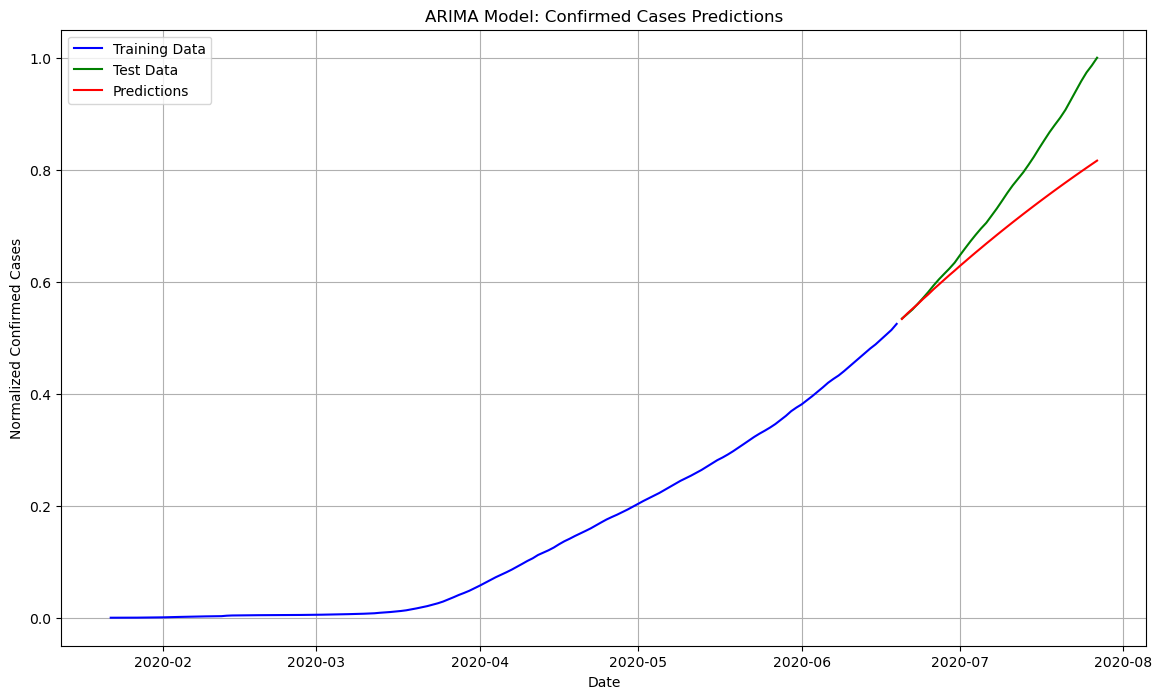

In [41]:
# Plot predictions vs actual
plt.figure(figsize=(14, 8))
plt.plot(train, label='Training Data', color='blue')
plt.plot(test['Confirmed'], label='Test Data', color='green')
plt.plot(test['Predicted'], label='Predictions', color='red')
plt.title('ARIMA Model: Confirmed Cases Predictions')
plt.xlabel('Date')
plt.ylabel('Normalized Confirmed Cases')
plt.legend()
plt.grid()
plt.show()